In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

# Stationary Problem

In [2]:
def plot_gaussian(x,Reward_distribution): 
    plt.figure(figsize=(15,15))
    plt.subplot(10,1,1)
    plt.grid() 
    plt.plot(x, Reward_distribution[0])
    plt.subplot(10,1,2)
    plt.grid() 
    plt.plot(x, Reward_distribution[1]) 
    plt.subplot(10,1,3)
    plt.grid() 
    plt.plot(x, Reward_distribution[2]) 
    plt.subplot(10,1,4)
    plt.grid() 
    plt.plot(x, Reward_distribution[3]) 
    plt.subplot(10,1,5)
    plt.grid() 
    plt.plot(x, Reward_distribution[4]) 
    plt.subplot(10,1,6)
    plt.grid() 
    plt.plot(x, Reward_distribution[5]) 
    plt.subplot(10,1,7)
    plt.grid() 
    plt.plot(x, Reward_distribution[6])
    plt.subplot(10,1,8)
    plt.grid() 
    plt.plot(x, Reward_distribution[7]) 
    plt.subplot(10,1,9)
    plt.grid() 
    plt.plot(x, Reward_distribution[8])
    plt.subplot(10,1,10)
    plt.grid() 
    plt.plot(x, Reward_distribution[9]) 


def Reward_k(k,q_star,plotting=False):
    x = np.arange(-3, 3, 0.01)
    
    # Each Action's Reward Distribution , mean = Q_star , std=1
    Reward_temp = []
    for i in range(10):
        Reward_temp.append((norm.pdf(x, loc=q_star[i], scale=1)))
    
    # for probabilty Sum = 1
    Reward_distribution = []
    for i in range(10):
        Reward_distribution.append(np.array(Reward_temp[i])*1/np.sum(Reward_temp[i]))
    
    
    # the Reward distribution of each Action Visualization
    if plotting == True:
        print(f'Action : {k}')
        plot_gaussian(x,Reward_distribution)
    return np.random.choice(x, p=Reward_distribution[k])

In [3]:
# Action Value Update
def Q_npus1(qn,rn,alpha):
    return qn + alpha*(rn-qn)

# Epsilon Greedy Action Selection
def act_select(qn,epsilon):
    if np.sum(qn)== 0:
        return random.randint(0,9)
    else:
        argmax_num = np.argmax(qn)
        other_num = np.delete(np.arange(0,10,1),argmax_num)
        output_list = [argmax_num ,np.random.choice(other_num)]
        
        return np.random.choice(output_list,p=[1-epsilon,epsilon])
    

In [9]:
# Make 200 Sample
q_star_list = []
for i in range(200):
    q_star_list.append(np.random.normal(0,1,10))
q_star = q_star_list[-1]

In [10]:
def calculate_Q(epsilon,epoch,sample_avg=True,alpha_value=0.1,q_star=q_star):
    N_action = [0,0,0,0,0,0,0,0,0,0]
    Q_list = []
    Q = np.array(np.zeros(10))
    rn_list= []
    avg_reward_epsilon = []
    time = 0

    for i in range(epoch):
        time+=1
        
        action_selection = act_select(Q,epsilon)
        N_action[action_selection] +=1
        qn = Q[action_selection]
        rn = Reward_k(action_selection,q_star)
        if sample_avg == True:
            alpha = 1/N_action[action_selection]
        else:
            alpha = alpha_value
        rn_list.append(rn) 
        avg_reward_epsilon.append(sum(rn_list)/time)
        Q[action_selection] = Q_npus1(qn,rn,alpha)
        Q_list.append(Q)

    # print("N_action : ",N_action)
    # print("Q_Value  :",Q)
    
    return rn_list,N_action,Q_list

Action : 0


-1.7100000000000275

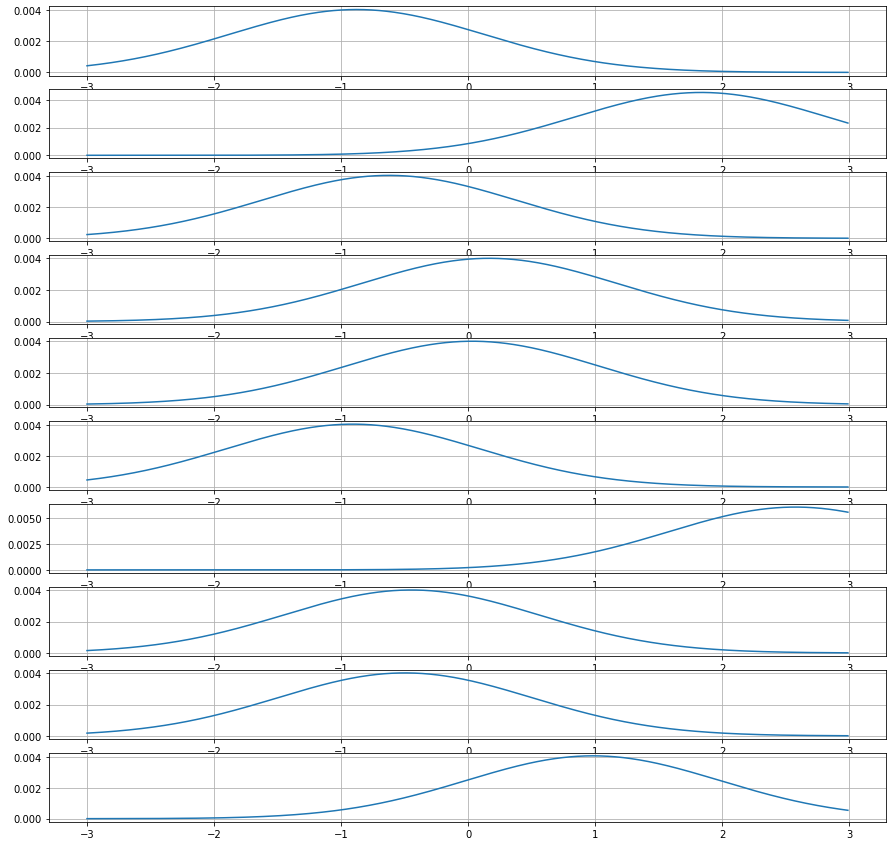

In [11]:
# For Visualization
Reward_k(0,q_star,True)

In [12]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_Q(epsilon = 0,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


reward_avg_0 = []
for i in range(1000):
    reward_avg_0.append(np.sum(np.array(Reward_list)[:,i])/200)

In [13]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_Q(epsilon = 0.3,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


reward_avg_0_3 = []
for i in range(1000):
    reward_avg_0_3.append(np.sum(np.array(Reward_list)[:,i])/200)

In [14]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_Q(epsilon = 0.1,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


reward_avg_0_1 = []
for i in range(1000):
    reward_avg_0_1.append(np.sum(np.array(Reward_list)[:,i])/200)

In [15]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_Q(epsilon = 0.05,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


reward_avg_0_05 = []
for i in range(1000):
    reward_avg_0_05.append(np.sum(np.array(Reward_list)[:,i])/200)

In [16]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_Q(epsilon = 0.01,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


reward_avg_0_01 = []
for i in range(1000):
    reward_avg_0_01.append(np.sum(np.array(Reward_list)[:,i])/200)

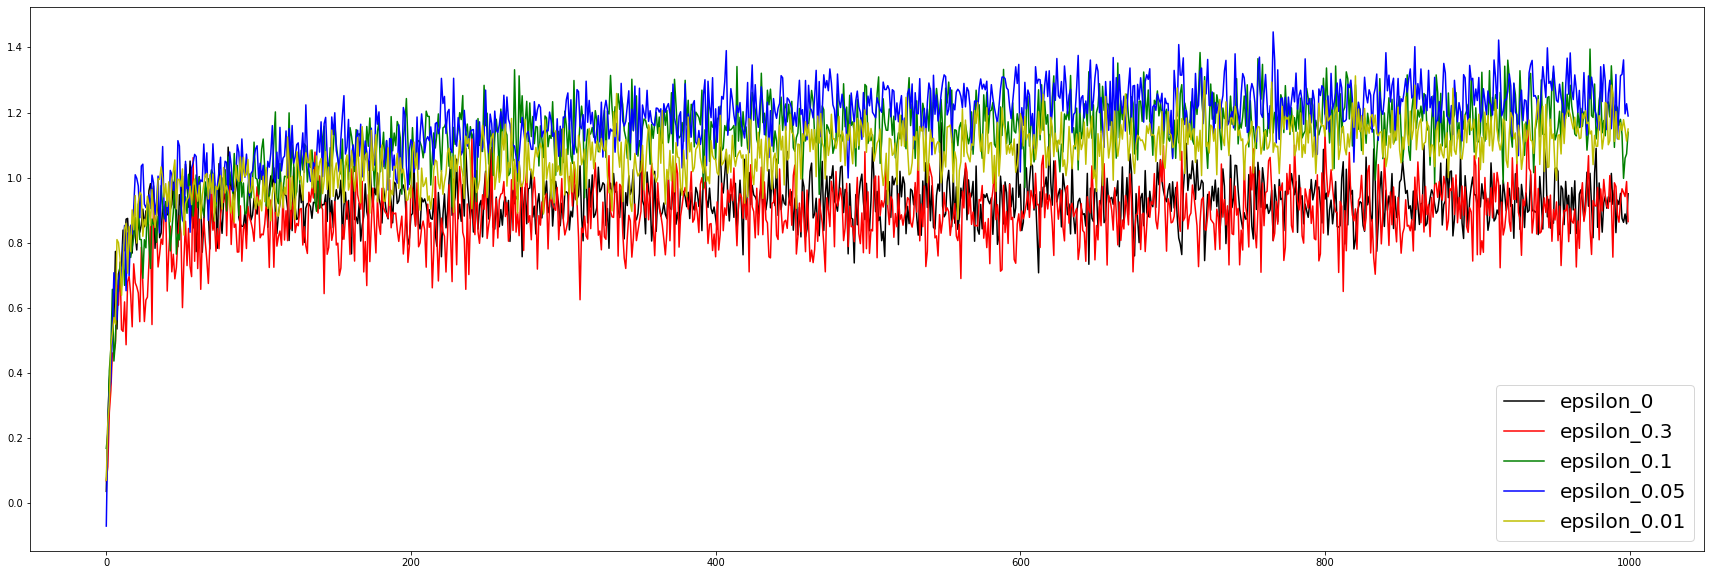

In [17]:
plt.figure(figsize=(30,10))
plt.plot(reward_avg_0,'k',label = 'epsilon_0')
plt.plot(reward_avg_0_3,'r',label = 'epsilon_0.3')
plt.plot(reward_avg_0_1,'g',label = 'epsilon_0.1')
plt.plot(reward_avg_0_05,'b',label = 'epsilon_0.05')
plt.plot(reward_avg_0_01,'y',label = 'epsilon_0.01')
plt.legend(fontsize=20)
plt.show()

# Non-Stationary

#### Sample Average 시간간격

In [18]:
def q_star_zitter(q_star,sigma=0.1):
    for i in range(10):
        q_star[i] += random.gauss(0,sigma)
        if q_star[i] >= 3:
            q_star[i] = 3
        elif q_star[i] <= -3:
            q_star[i] = -3
    return q_star

In [19]:
def calculate_zitter_Q(epsilon,epoch,sample_avg=True,alpha_value=0.1,q_star=q_star):
    N_action = [0,0,0,0,0,0,0,0,0,0]
    Q_list = []
    Q = np.array(np.zeros(10))
    rn_list= []
    avg_reward_epsilon = []
    time = 0

    for i in range(epoch):
        time+=1
        
        action_selection = act_select(Q,epsilon)
        N_action[action_selection] +=1
        qn = Q[action_selection]
        q_star = q_star_zitter(q_star)
        rn = Reward_k(action_selection,q_star)
        if sample_avg == True:
            alpha = 1/N_action[action_selection]
        else:
            alpha = alpha_value
        rn_list.append(rn) 
        avg_reward_epsilon.append(sum(rn_list)/time)
        Q[action_selection] = Q_npus1(qn,rn,alpha)
        Q_list.append(Q)

    # print("N_action : ",N_action)
    # print("Q_Value  :",Q)
    
    return rn_list,N_action,Q_list

In [20]:
q_star = np.random.normal(0,1,10)
q_star_list = []
for i in range(200):
    q_star_list.append(np.random.normal(0,1,10))

In [21]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


zitter_reward_avg_0 = []
for i in range(1000):
    zitter_reward_avg_0.append(np.sum(np.array(Reward_list)[:,i])/200)

In [22]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.3,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


zitter_reward_avg_0_3 = []
for i in range(1000):
    zitter_reward_avg_0_3.append(np.sum(np.array(Reward_list)[:,i])/200)

In [23]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.1,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


zitter_reward_avg_0_1 = []
for i in range(1000):
    zitter_reward_avg_0_1.append(np.sum(np.array(Reward_list)[:,i])/200)

In [24]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.05,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


zitter_reward_avg_0_05 = []
for i in range(1000):
    zitter_reward_avg_0_05.append(np.sum(np.array(Reward_list)[:,i])/200)

In [25]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.01,epoch = 1000, sample_avg=True , q_star=q_star)
    Reward_list.append(rn_list)


zitter_reward_avg_0_01 = []
for i in range(1000):
    zitter_reward_avg_0_01.append(np.sum(np.array(Reward_list)[:,i])/200)

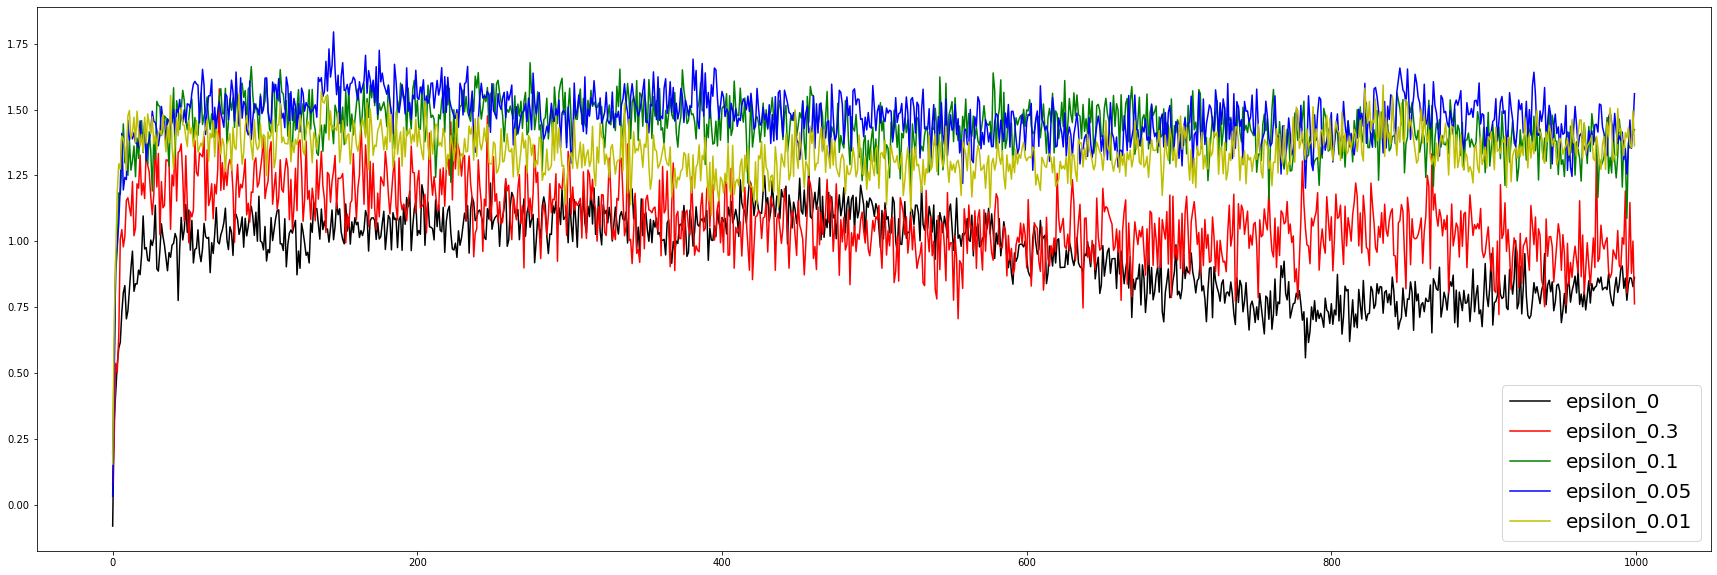

In [26]:
plt.figure(figsize=(30,10))
plt.plot(zitter_reward_avg_0,'k',label = 'epsilon_0')
plt.plot(zitter_reward_avg_0_3,'r',label = 'epsilon_0.3')
plt.plot(zitter_reward_avg_0_1,'g',label = 'epsilon_0.1')
plt.plot(zitter_reward_avg_0_05,'b',label = 'epsilon_0.05')
plt.plot(zitter_reward_avg_0_01,'y',label = 'epsilon_0.01')
plt.legend(fontsize=20)
plt.show()

#### 고정된 시간간격

In [27]:
q_star = np.random.normal(0,1,10)
q_star_list = []
for i in range(200):
    q_star_list.append(np.random.normal(0,1,10))

In [28]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0,epoch = 1000, sample_avg=False, alpha_value=0.1,q_star=q_star)
    Reward_list.append(rn_list)


alp_zitter_reward_avg_0 = []
for i in range(1000):
    alp_zitter_reward_avg_0.append(np.sum(np.array(Reward_list)[:,i])/200)

In [29]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.3,epoch = 1000, sample_avg=False, alpha_value=0.1,q_star=q_star)
    Reward_list.append(rn_list)


alp_zitter_reward_avg_0_3 = []
for i in range(1000):
    alp_zitter_reward_avg_0_3.append(np.sum(np.array(Reward_list)[:,i])/200)

In [30]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.1,epoch = 1000, sample_avg=False, alpha_value=0.1,q_star=q_star)
    Reward_list.append(rn_list)


alp_zitter_reward_avg_0_1 = []
for i in range(1000):
    alp_zitter_reward_avg_0_1.append(np.sum(np.array(Reward_list)[:,i])/200)

In [31]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.05,epoch = 1000, sample_avg=False, alpha_value=0.1,q_star=q_star)
    Reward_list.append(rn_list)


alp_zitter_reward_avg_0_05 = []
for i in range(1000):
    alp_zitter_reward_avg_0_05.append(np.sum(np.array(Reward_list)[:,i])/200)

In [32]:
Reward_list = []
for q_star in q_star_list:
    rn_list , N_action_0 , Q_list = calculate_zitter_Q(epsilon = 0.01,epoch = 1000, sample_avg=False, alpha_value=0.1,q_star=q_star)
    Reward_list.append(rn_list)


alp_zitter_reward_avg_0_01 = []
for i in range(1000):
    alp_zitter_reward_avg_0_01.append(np.sum(np.array(Reward_list)[:,i])/200)

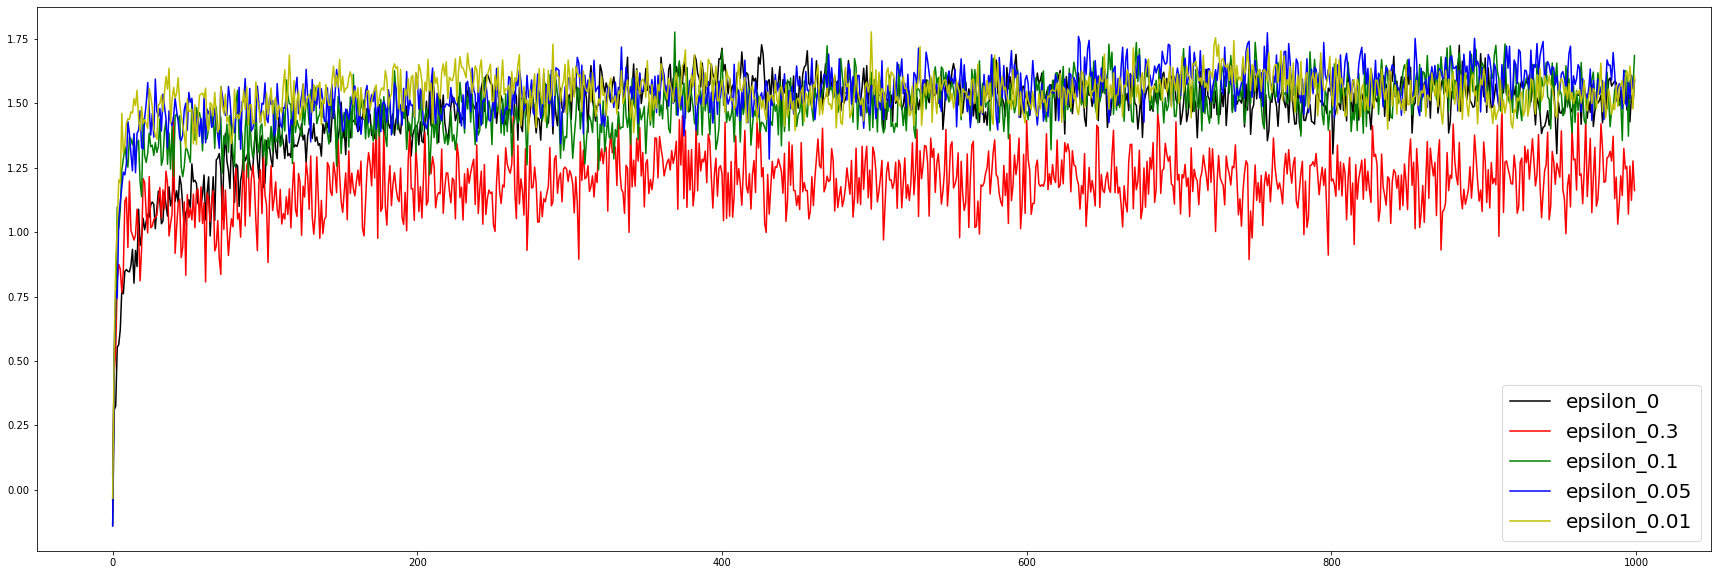

In [33]:
plt.figure(figsize=(30,10))
plt.plot(alp_zitter_reward_avg_0,'k',label = 'epsilon_0')
plt.plot(alp_zitter_reward_avg_0_3,'r',label = 'epsilon_0.3')
plt.plot(alp_zitter_reward_avg_0_1,'g',label = 'epsilon_0.1')
plt.plot(alp_zitter_reward_avg_0_05,'b',label = 'epsilon_0.05')
plt.plot(alp_zitter_reward_avg_0_01,'y',label = 'epsilon_0.01')
plt.legend(fontsize=20)
plt.show()

# Other Ref

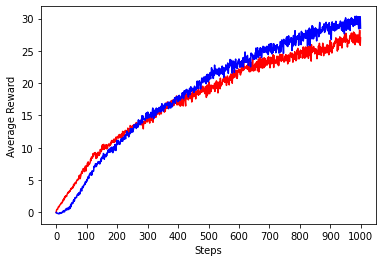

[[  8 -31  26 ... -32  37 -12]
 [ -2 -16  -7 ... -34 -16 -10]
 [-50 -15   7 ...   5  15   9]
 ...
 [ -9  -6 -16 ...  -8  11  -2]
 [  3  31 -59 ... -28  39  19]
 [-16   3  -1 ... -10 -31  57]]
[[  0  -8   7 ... -10  36   6]
 [ -1  -5  -7 ... -15  -8  -2]
 [-16  -5   1 ...   2  11   8]
 ...
 [ -6   1  -3 ...  -1   2  -1]
 [  0   3 -26 ...  -1  32   8]
 [ -1   0   2 ...   0  -4  50]]
[[  0 -22   6 ...  -3   7   1]
 [  0   0 -13 ... -24  -7   0]
 [-25   0   3 ...   5  10   2]
 ...
 [  0   0  -5 ...  -1   3  -2]
 [  0   9   7 ...  -5  11  12]
 [  0   0   0 ...   0  -6   8]]


In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
def RandomWalk(x):
    #x is a vector, each element takes random walk independently, this function return a new vector where each element takes a step by the rule of  random walk
    dim=np.size(x)
    walk_set=[-1,1,0]
    for i in range(dim):
        x[i]=x[i]+np.random.choice(walk_set)
    return x

def eps_greedy(epsilon, Q):
    # This function return an action chosen by epsilon greedy algorithm given the current action value estimate is Q
    i=np.argmax(Q)
    dim=np.size(Q)
    action_space=range(0,dim,1)
    sample=np.random.uniform(0,1)
    if sample<=1-epsilon:
        return i
    else:
       np.delete(action_space,i)
       return np.random.choice(action_space)

def multi_task(max_iter,task_number,epsilon,arm_number,step_size):
    rows, cols = task_number,arm_number
    my_matrix =np.array( [([0]*cols) for i in range(rows)] )
    constQ=np.array( [([0]*cols) for i in range(rows)] )
    variaQ=np.array( [([0]*cols) for i in range(rows)] )
    q=np.array( [([0]*cols) for i in range(rows)] )
    constN=np.array( [([0]*cols) for i in range(rows)] )
    variaN=np.array( [([0]*cols) for i in range(rows)] )
    constR=np.zeros(max_iter)
    variaR=np.zeros(max_iter)
    for i in range(max_iter):
        for j in range(task_number):
            #random walk of each arm
            task_q=q[j,:]
            task_q=RandomWalk(task_q)
            q[j,:]=task_q
            #constant stepsize
            
            task_constQ=constQ[j,:]
            task_constN=constN[j,:]
            action_const=eps_greedy(epsilon,task_constQ)
            
            RewardConst=task_q[action_const]
            constR[i]=constR[i]+RewardConst
            task_constN[action_const]=task_constN[action_const]+1
            alpha=step_size
            difference=RewardConst-task_constQ[action_const]
            task_constQ[action_const]=task_constQ[action_const]+alpha*difference
            constQ[j,:]=task_constQ
            constN[j,:]=task_constN
            #Changing stepsize
            task_variaQ=variaQ[j,:]
            task_variaN=variaN[j,:]
            action_varia=eps_greedy(epsilon,task_variaQ)
            reward_varia=task_q[action_varia]
            task_variaN[action_varia]=task_variaN[action_varia]+1
            if i==0:
                beta=1
            else:
                beta=1/task_variaN[action_varia]
            task_variaQ[action_varia]=task_variaQ[action_varia]+beta*(reward_varia-task_variaQ[action_varia])
            
            variaN[j,:]=task_variaN
            variaQ[j,:]=task_variaQ
            variaR[i]=variaR[i]+reward_varia
        variaR[i]=variaR[i]/task_number
        constR[i]=constR[i]/task_number
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.plot(variaR,color='r')
    plt.plot(constR,color='b')
    plt.xticks(np.arange(0,max_iter+1,100))
    #plt.xticks(np.arange(len(constR)), np.arange(100, len(constR)+1) )
    # plt.grid()
    plt.show()
    plt.close()
    print(q)
    print(constQ)
    print(variaQ)

max_iter=1000
task_number=500
epsilon=0.1
arm_number=10
step_size=0.1
multi_task(max_iter,task_number,epsilon,arm_number,step_size)